In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
from datasets.mnist import MNIST
from mnist_mlp import MnistAlae

In [4]:
mnist = MNIST()
alae = MnistAlae()

In [5]:
alae.load_weights('../ckpt/mnist_mlp')

In [6]:
x_train, y_train = mnist.rawdata()
x_test, y_test = mnist.rawdata(train=False)
empty_labels = np.zeros((x_test.shape[0], 10))
testset = np.concatenate((x_test.reshape(-1, 784), empty_labels), axis=-1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



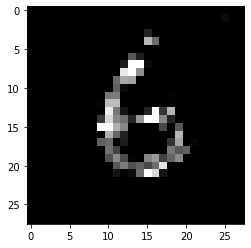

In [7]:
idx = 91
_, image = alae(testset[idx:idx + 1])
plt.imshow(image.numpy()[0, :784].reshape(28, 28), cmap='gray')

In [8]:
idxA, idxB = 84, 12
latentA = alae.encode(testset[idxA:idxA + 1])
latentB = alae.encode(testset[idxB:idxB + 1])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



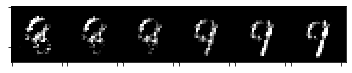

In [9]:
num = 5
delta = (latentB - latentA) / num
fig, axs = plt.subplots(1, num + 1)

latent = latentA
for i in range(num + 1):
    image = alae.generate(latent).numpy()[0, :784].reshape(28, 28)
    plt.setp(axs[i].get_xticklabels(), visible=False)
    plt.setp(axs[i].get_yticklabels(), visible=False)
    axs[i].imshow(image, cmap='gray')
    latent += delta

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)

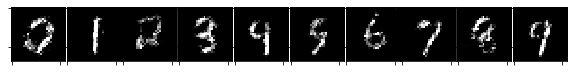

In [10]:
cherrypicked = [3, 14, 82, 68, 19, 23, 91, 0, 84, 12]
fig = plt.figure(figsize=(10, 1))
axs = [fig.add_subplot(1, 10, i + 1) for i in range(10)]

for i in range(10):
    ax = axs[i]
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    
    idx = cherrypicked[i]
    _, image = alae(testset[idx:idx + 1])
    ax.imshow(image.numpy()[0, :784].reshape(28, 28), cmap='gray')

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('enum', bbox_inches='tight', pad_inches=0)

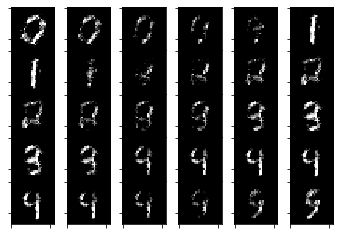

In [11]:
num = 5
fig, axs = plt.subplots(5, num + 1)

for j, (a, b) in enumerate(zip(cherrypicked[:5], cherrypicked[1:6])):
    latentA = alae.encode(testset[a:a + 1])
    latentB = alae.encode(testset[b:b + 1])

    delta = (latentB - latentA) / num

    latent = latentA
    for i in range(num + 1):
        image = alae.generate(latent).numpy()[0, :784].reshape(28, 28)
        plt.setp(axs[j, i].get_xticklabels(), visible=False)
        plt.setp(axs[j, i].get_yticklabels(), visible=False)
        axs[j, i].imshow(image, cmap='gray')
        latent += delta

fig.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('polymorph', bbox_inches='tight', pad_inches=0)